## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [207]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [532]:
flights = pd.read_csv('../../lighthouse-projects/Flight_Delay_Predictor/data/flights_10k.csv')
passengers = pd.read_csv('../../lighthouse-projects/Flight_Delay_Predictor/data/passengers_10k.csv')
fuel_comsumption = pd.read_csv('../../lighthouse-projects/Flight_Delay_Predictor/data/fuel_comsumption_10k.csv')

In [41]:
flights.shape

(9835, 45)

In [42]:
flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,year,month,day
0,2018-01-02,AA,AA_CODESHARE,AA,5326,OH,N500AE,5326,11057,CLT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,1,2
1,2018-01-02,AA,AA_CODESHARE,AA,5328,OH,N562NN,5328,11057,CLT,...,0.0,0.0,33.0,NaN,NaN,NaN,NaN,2018,1,2
2,2018-01-02,AA,AA_CODESHARE,AA,5329,OH,N710PS,5329,12217,HSV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,1,2
3,2018-01-02,AA,AA_CODESHARE,AA,5330,OH,N563NN,5330,11057,CLT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,1,2
4,2018-01-02,AA,AA_CODESHARE,AA,5331,OH,N554NN,5331,11057,CLT,...,14.0,0.0,0.0,NaN,NaN,NaN,NaN,2018,1,2


#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [43]:
flights['arr_delay'].describe()

count    9812.000000
mean        5.811863
std        50.743437
min       -75.000000
25%       -15.000000
50%        -6.000000
75%         8.000000
max      1206.000000
Name: arr_delay, dtype: float64

In [203]:
# Remove outliers
filter = (flights['arr_delay'] < 125) & (flights['arr_delay'] > -60)
flights_no = flights[filter]
flights_no.shape

(9556, 45)

In [204]:
flights_no['arr_delay'].describe()

count    9556.000000
mean        0.008476
std        26.129726
min       -57.000000
25%       -15.000000
50%        -7.000000
75%         6.000000
max       124.000000
Name: arr_delay, dtype: float64

/Users/jandas/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='arr_delay', ylabel='Density'>

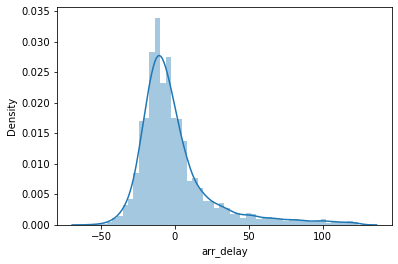

In [205]:
sns.distplot(flights_no['arr_delay'])

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [214]:
fl_mean = flights_no[['arr_delay', 'year', 'month']][filter].groupby(['year','month']).agg({'arr_delay': ['mean', 'median']})
fl_mean.columns = fl_mean.columns.droplevel()
fl_mean.reset_index()

<ipython-input-214-a64df8f0e6fd>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fl_mean = flights_no[['arr_delay', 'year', 'month']][filter].groupby(['year','month']).agg({'arr_delay': ['mean', 'median']})


,year,month,mean,median
0,2018,1,-0.906832,-5.0
1,2018,2,-4.097421,-9.0
2,2018,3,-1.339623,-6.0
3,2018,4,-3.434783,-8.5
4,2018,5,0.249315,-6.0
5,2018,6,1.693750,-7.0
6,2018,7,5.017123,-3.0
7,2018,8,5.105477,-4.0
8,2018,9,0.013029,-7.0
9,2018,10,-2.526316,-6.0


<AxesSubplot:xlabel='month', ylabel='mean'>

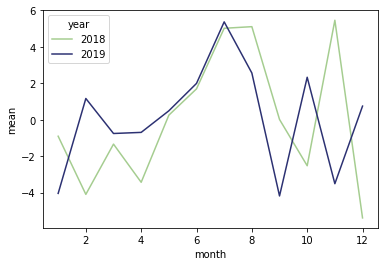

In [223]:
sns.lineplot(data=fl_mean, x="month", y="mean", hue="year", palette="crest")

<AxesSubplot:xlabel='month', ylabel='median'>

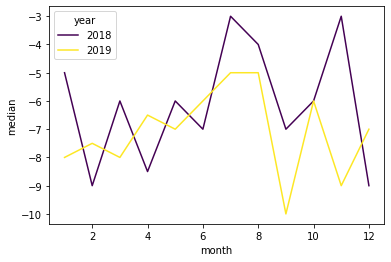

In [224]:
sns.lineplot(data=fl_mean, x="month", y="median", hue="year", palette="viridis")

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

In [210]:
flights_no['taxi_in'].dtypes

dtype('float64')

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [211]:
# Taxi-out times
taxi_out = flights_no[['taxi_out', 'dep_time']]
taxi_out['dep_hour'] = taxi_out['dep_time'] // 100
plot_to = taxi_out[['taxi_out', 'dep_hour']].groupby(['dep_hour']).mean().reset_index().sort_values(by='dep_hour')

plot_to

<ipython-input-211-9d00474379e9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_out['dep_hour'] = taxi_out['dep_time'] // 100


,dep_hour,taxi_out
0,0,15.222222
1,1,12.666667
2,2,10.500000
3,3,11.500000
4,4,12.793103
5,5,16.307692
6,6,16.877419
7,7,17.656566
8,8,19.171244
9,9,17.896321


In [212]:
# Taxi-out times
taxi_in = flights_no[['taxi_in', 'arr_time']]
taxi_in['arr_hour'] = taxi_in['arr_time'] // 100
plot_ti = taxi_in[['taxi_in', 'arr_hour']].groupby(['arr_hour']).mean().reset_index().sort_values(by='arr_hour')

plot_ti

<ipython-input-212-bdde213e500a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_in['arr_hour'] = taxi_in['arr_time'] // 100


,arr_hour,taxi_in
0,0.0,6.554878
1,1.0,6.714286
2,2.0,4.750000
3,3.0,6.500000
4,4.0,5.875000
5,5.0,7.904762
6,6.0,7.951087
7,7.0,7.549451
8,8.0,8.495108
9,9.0,7.669611


<AxesSubplot:xlabel='dep_hour', ylabel='taxi_out'>

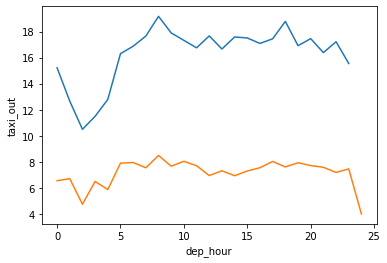

In [213]:
#sns.lineplot(data=taxi, x="dep_time", y="taxi_out", )
#sns.lineplot(data=taxi, x="arr_time", y="taxi_in", )
sns.lineplot(data=plot_to, x="dep_hour", y="taxi_out")
sns.lineplot(data=plot_ti, x="arr_hour", y="taxi_in")

In [ ]:
sns.distplot(flights['arr_delay'][filter])

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

#### **Task 6**: How many states cover 50% of US air traffic? 

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

In [ ]:
# work on this

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

In [229]:
haul_flights = flights_no[['wheels_off', 'air_time']]
haul_flights['wheels_off_hour'] = flights_no['wheels_off'] // 100
haul_flights['air_time'].describe()
haul_flights.head()

<ipython-input-229-b37bb3f6cfdf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  haul_flights['wheels_off_hour'] = flights_no['wheels_off'] // 100


,wheels_off,air_time,wheels_off_hour
0,2043,25.0,20
1,2346,24.0,23
2,625,62.0,6
3,1022,56.0,10
4,957,59.0,9


##### Definition of haul flight 
- **Short-haul** = 30 minutes to 3 hours (all less than 3 hours for this exercise)
- **Medium-hau**l = between 3-6 hours
- **Long-haul** = more than 6

In [234]:
haul_flights.loc[haul_flights['air_time'] < 180,'haul'] = 'Short'
haul_flights.loc[(haul_flights['air_time'] >= 180) & (haul_flights['air_time'] < 360),'haul'] = 'Medium'
haul_flights.loc[haul_flights['air_time'] >= 360,'haul'] = 'Long'
haul_flights.head()

/Users/jandas/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,wheels_off,air_time,wheels_off_hour,haul
0,2043,25.0,20,Short
1,2346,24.0,23,Short
2,625,62.0,6,Short
3,1022,56.0,10,Short
4,957,59.0,9,Short


In [308]:
pd.set_option('display.max_rows', None)
max_haul = haul_flights[['wheels_off_hour', 'haul', 'air_time']].groupby(['wheels_off_hour', 'haul']).agg({'haul': ['size']})
max_haul.columns = max_haul.columns.droplevel()
max_haul = max_haul.reset_index().sort_values(by='size', ascending=False)
print(max_haul.loc[max_haul['haul']== 'Short'].head(1))
print(max_haul.loc[max_haul['haul']== 'Medium'].head(1))
print(max_haul.loc[max_haul['haul']== 'Long'].head(1))

    wheels_off_hour   haul  size
13                6  Short   579
    wheels_off_hour    haul  size
15                7  Medium    99
    wheels_off_hour  haul  size
20                9  Long     5


In [296]:
print(max_haul[max_haul['haul']== 'Short'].max())
print(max_haul[max_haul['haul']== 'Medium'].max())
print(max_haul[max_haul['haul']== 'Long'].max())

wheels_off_hour       24
haul               Short
size                 579
dtype: object
wheels_off_hour        23
haul               Medium
size                   99
dtype: object
wheels_off_hour      21
haul               Long
size                  5
dtype: object


In [258]:
# Plot
plot_haul = haul_flights[['wheels_off_hour', 'haul', 'air_time']].groupby(['wheels_off_hour', 'haul']).size().reset_index()
plot_haul.columns = ['take_off_hour', 'flight_haul', 'total']
plot_haul.describe()

plot_haul['total'] = plot_haul['total'].apply(np.log)
#df_train["1stFlrSF_log"] = df_train["1stFlrSF"].apply(np.log)

<AxesSubplot:xlabel='take_off_hour', ylabel='total'>

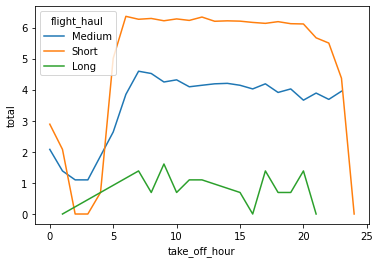

In [259]:
sns.lineplot(data=plot_haul, x='take_off_hour', y='total', hue='flight_haul')

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

In [435]:
total_flights = flights_no[['mkt_unique_carrier', 'origin_airport_id','dest_airport_id','year', 'month']].groupby(['mkt_unique_carrier', 'origin_airport_id','dest_airport_id','year', 'month']).size().reset_index()
total_flights.columns = ['unique_carrier', 'origin_airport_id','dest_airport_id','year', 'month', 'flights']
total_flights.head()

,unique_carrier,origin_airport_id,dest_airport_id,year,month,flights
0,AA,10135,14100,2018,4,1
1,AA,10135,14100,2019,1,1
2,AA,10136,11298,2018,8,2
3,AA,10136,11298,2019,4,1
4,AA,10136,11298,2019,5,1


In [433]:
total_passengers = passengers[['unique_carrier','origin_airport_id', 'dest_airport_id', 'year', 'month', 'departures_performed','passengers']].groupby(['unique_carrier','origin_airport_id', 'dest_airport_id', 'year', 'month']).sum().reset_index()
#total_passengers['avg_passengers']= total_passengers['passengers'] / total_passengers['departures_performed']
total_passengers.head()

,unique_carrier,origin_airport_id,dest_airport_id,year,month,departures_performed,passengers
0,AA,10136,11298,2019,4,2,266
1,AA,10136,11298,2019,5,1,143
2,AA,10140,11298,2018,3,142,18560
3,AA,10140,11298,2019,9,175,24443
4,AA,10140,11298,2019,11,189,23047


In [480]:
# Total flights per airport
join_flights = pd.merge(total_flights, total_passengers, how='inner', on=['unique_carrier', 'origin_airport_id','dest_airport_id','year', 'month'])

# group 
#join_flights =join_flights[['origin_airport_id','dest_airport_id', 'flights', 'departures_performed', 'passengers']].groupby(['origin_airport_id','dest_airport_id']).sum().reset_index()
join_flights =join_flights[['origin_airport_id','dest_airport_id', 'flights', 'departures_performed', 'passengers']]
# calculate new columns

join_flights.head()

,origin_airport_id,dest_airport_id,flights,departures_performed,passengers
0,10136,11298,1,2,266
1,10136,11298,1,1,143
2,10140,11298,1,142,18560
3,10140,11298,1,175,24443
4,10140,11298,1,189,23047


In [492]:
# Generate departures and arraivals
departures = join_flights[['origin_airport_id', 'flights', 'departures_performed', 'passengers']]
departures.columns = ['airport_id', 'dep_flights', 'dep_departures_performed', 'dep_passengers']
departures = departures.groupby(['airport_id']).sum().reset_index()
# arrivals
arrivals = join_flights[['dest_airport_id', 'flights', 'departures_performed', 'passengers']]
arrivals.columns = ['airport_id', 'arr_flights', 'arr_departures_performed', 'arr_passengers']
arrivals = arrivals.groupby(['airport_id']).sum().reset_index()

airport_traffic = pd.merge(departures, arrivals, how='inner', on='airport_id' )
airport_traffic.head()

,airport_id,dep_flights,dep_departures_performed,dep_passengers,arr_flights,arr_departures_performed,arr_passengers
0,10135,3,62,5885,7,185,21986
1,10140,59,2244,269284,18,680,83985
2,10208,2,144,19020,1,56,7637
3,10257,7,255,28608,9,275,33462
4,10279,1,27,3028,1,26,2363


In [497]:
5885/62

94.91935483870968

In [498]:
21986 / 185

118.84324324324324

In [500]:
# calculate new columns
airport_traffic['flights']= airport_traffic['dep_flights'] + airport_traffic['arr_flights']
airport_traffic['avg_dep_passengers']= airport_traffic['dep_passengers'] / airport_traffic['dep_departures_performed']
airport_traffic['avg_arr_passengers']= airport_traffic['arr_passengers'] / airport_traffic['arr_departures_performed']
airport_traffic['avg_passengers'] = airport_traffic['avg_dep_passengers'] + airport_traffic['avg_arr_passengers']
airport_traffic['passengers']= airport_traffic['avg_passengers'] * airport_traffic['flights']
airport_traffic.head()

,airport_id,dep_flights,dep_departures_performed,dep_passengers,arr_flights,arr_departures_performed,arr_passengers,flights,avg_dep_passengers,avg_arr_passengers,avg_passengers,passengers
0,10135,3,62,5885,7,185,21986,10,94.919355,118.843243,213.762598,2137.625981
1,10140,59,2244,269284,18,680,83985,77,120.001783,123.507353,243.509135,18750.203431
2,10208,2,144,19020,1,56,7637,3,132.083333,136.375000,268.458333,805.375000
3,10257,7,255,28608,9,275,33462,16,112.188235,121.680000,233.868235,3741.891765
4,10279,1,27,3028,1,26,2363,2,112.148148,90.884615,203.032764,406.065527


In [501]:
airport_traffic = airport_traffic[['airport_id', 'flights', 'passengers']]

In [502]:
airport_traffic.head()

,airport_id,flights,passengers
0,10135,10,2137.625981
1,10140,77,18750.203431
2,10208,3,805.375000
3,10257,16,3741.891765
4,10279,2,406.065527


In [505]:
airport_traffic.sort_values(by='flights', ascending=False).head(10)

,airport_id,flights,passengers
5,10397,802,221347.309199
120,13930,603,166961.255064
40,11292,536,158382.871096
41,11298,508,141462.217437
87,12892,470,142035.920764
150,14747,415,112748.635687
152,14771,386,110778.190502
127,14107,360,102488.598592
32,11057,353,94125.298207
73,12266,327,89976.728733


In [506]:
airport_traffic.sort_values(by='passengers', ascending=False).head(10)

,airport_id,flights,passengers
5,10397,802,221347.309199
120,13930,603,166961.255064
40,11292,536,158382.871096
87,12892,470,142035.920764
41,11298,508,141462.217437
150,14747,415,112748.635687
152,14771,386,110778.190502
127,14107,360,102488.598592
32,11057,353,94125.298207
49,11618,317,92000.103551


#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

In [520]:
flights_no['delay_fl']=0
flights_no.loc[flights['arr_delay'] > 0,'delay_fl'] = 1
flights_no[['mkt_unique_carrier', 'year', 'month', 'delay_fl']].groupby(['mkt_unique_carrier', 'year', 'month']).mean().reset_index().head()

,mkt_unique_carrier,year,month,delay_fl
0,AA,2018,1,0.487500
1,AA,2018,2,0.400000
2,AA,2018,3,0.340659
3,AA,2018,4,0.220779
4,AA,2018,5,0.342593


In [521]:
flights_no[['mkt_unique_carrier', 'year', 'month', 'distance']].groupby(['mkt_unique_carrier', 'year', 'month']).sum().reset_index().head()

,mkt_unique_carrier,year,month,distance
0,AA,2018,1,60552
1,AA,2018,2,14546
2,AA,2018,3,65715
3,AA,2018,4,100285
4,AA,2018,5,64232


In [527]:
passengers_carriers = pd.merge(total_flights, total_passengers, how='inner', on=['unique_carrier', 'origin_airport_id','dest_airport_id','year', 'month'])
passengers_carriers['avg_passengers'] = (passengers_carriers['passengers'] / passengers_carriers['departures_performed']) * passengers_carriers['flights']

In [528]:
passengers_carriers.head()

,unique_carrier,origin_airport_id,dest_airport_id,year,month,flights,departures_performed,passengers,avg_passengers
0,AA,10136,11298,2019,4,1,2,266,133.000000
1,AA,10136,11298,2019,5,1,1,143,143.000000
2,AA,10140,11298,2018,3,1,142,18560,130.704225
3,AA,10140,11298,2019,9,1,175,24443,139.674286
4,AA,10140,11298,2019,11,1,189,23047,121.941799


In [531]:
passengers_carriers[['unique_carrier', 'avg_passengers']].groupby('unique_carrier').sum().reset_index().sort_values(by='avg_passengers', ascending=False).head(10)


,unique_carrier,avg_passengers
9,WN,194109.383743
0,AA,181534.489107
8,UA,178325.546084
3,DL,175130.689254
1,AS,43910.933042
2,B6,25963.980828
5,G4,18028.351649
7,NK,16810.657580
4,F9,16767.681048
6,HA,12886.964744


In [533]:
fuel_comsumption['unique_carrier'].nunique

,month,airline_id,unique_carrier,carrier,carrier_name,carrier_group_new,sdomt_gallons,satl_gallons,spac_gallons,slat_gallons,...,sdomt_cost,satl_cost,spac_cost,slat_cost,sint_cost,ts_cost,tdomt_cost,tint_cost,total_cost,year
0,1,19805,AA,AA,American Airlines Inc.,3,181805365,35379724,19744574,48979198,...,330993694,65177657,36092606,94494528,195764791,526758485,331867432,196062834,527930266,2019
1,1,20409,B6,B6,JetBlue Airways,3,55214112,0,0,15194099,...,107587447,0,0,29606459,29606459,137193906,107587447,29606459,137193906,2019
2,1,19790,DL,DL,Delta Air Lines Inc.,3,165835898,48129821,28376721,29135082,...,340011832,98680134,58180533,59735394,216596061,556607893,345424031,216968407,562392438,2019
3,1,20368,G4,G4,Allegiant Air,3,12442727,0,0,0,...,24884405,0,0,0,0,24884405,25451228,174212,25625440,2019
4,1,19690,HA,HA,Hawaiian Airlines Inc.,3,15257659,0,7346463,0,...,27092396,0,12857142,0,12857142,39949538,27129872,12857142,39987014,2019


In [537]:
fuel_comsumption[['unique_carrier', 'total_gallons']].groupby('unique_carrier').sum().reset_index().head(10)

,unique_carrier,total_gallons
0,AA,6416095839
1,AS,782335769
2,B6,585215768
3,DL,6310644705
4,F9,46115141
5,G4,62733342
6,HA,113738204
7,NK,260188222
8,UA,6123716594
9,WN,3473040006
